In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from math import pi
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('../dataset_music/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
#hapus kolom unmamed
df = df.drop(columns=['Unnamed: 0'])
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
#cek missing value
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
#bersihkan missing value
df = df.dropna()
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
#membuat label mood
def classify_mood(row):
  if row['valence'] >= 0.5 and row ['energy'] >= 0.5:
    return 'Happy'
  elif row['valence'] < 0.5 and row['energy'] < 0.5:
    return 'Sad'
  elif row['valence'] >= 0.5 and row['energy'] < 0.5:
    return 'Calm'
  else:
    return 'Tense'

In [8]:
#membuat label target
df['mood_label'] = df.apply(classify_mood, axis=1)

In [9]:
#membuat fitur untuk melatih model
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness',
            'instrumentalness', 'loudness', 'speechiness']
            

In [10]:
#split x dan y
X = df[features]
y = df['mood_label']

In [11]:
#encode target karena target masi string
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(91199, 8) (22800, 8)


In [13]:
#random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1799
           1       1.00      1.00      1.00      8665
           2       1.00      1.00      1.00      4514
           3       1.00      1.00      1.00      7822

    accuracy                           1.00     22800
   macro avg       1.00      1.00      1.00     22800
weighted avg       1.00      1.00      1.00     22800



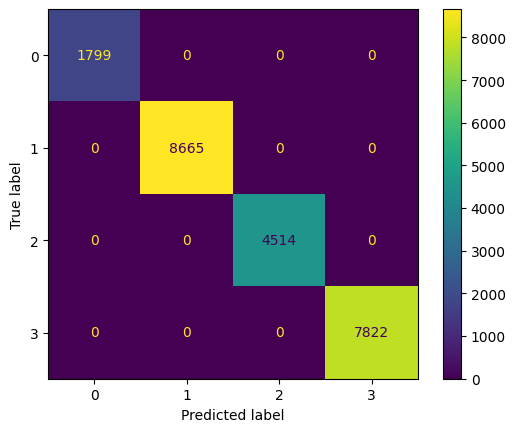

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
plt.show()

#0 = calm
#1 = happy
#2 = sad
#3 = tense

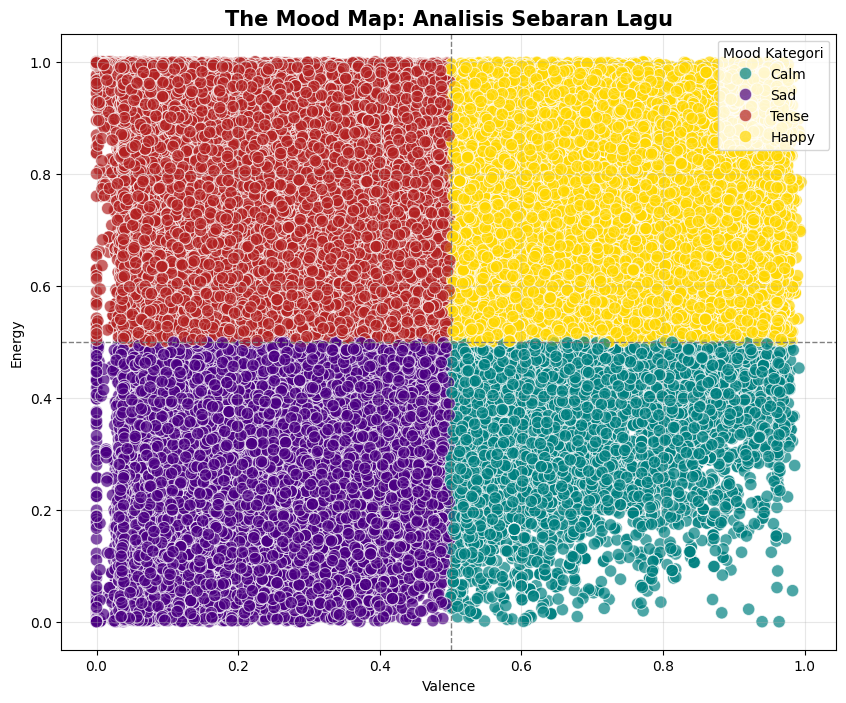

In [16]:
#visualisasi data

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='valence',
    y='energy',
    hue='mood_label',
    palette={'Happy': '#FFD700', 'Sad': '#4B0082', 'Calm': '#008080', 'Tense': '#B22222'},
    s=80,
    alpha=0.7,
    edgecolor='white'
  )

plt.axvline(0.5, color='gray', linestyle='--', linewidth=1)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)


plt.title('The Mood Map: Analisis Sebaran Lagu', fontsize=15, weight='bold')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.legend(title='Mood Kategori', loc='upper right')
plt.grid(True, alpha=0.3)

plt.show()

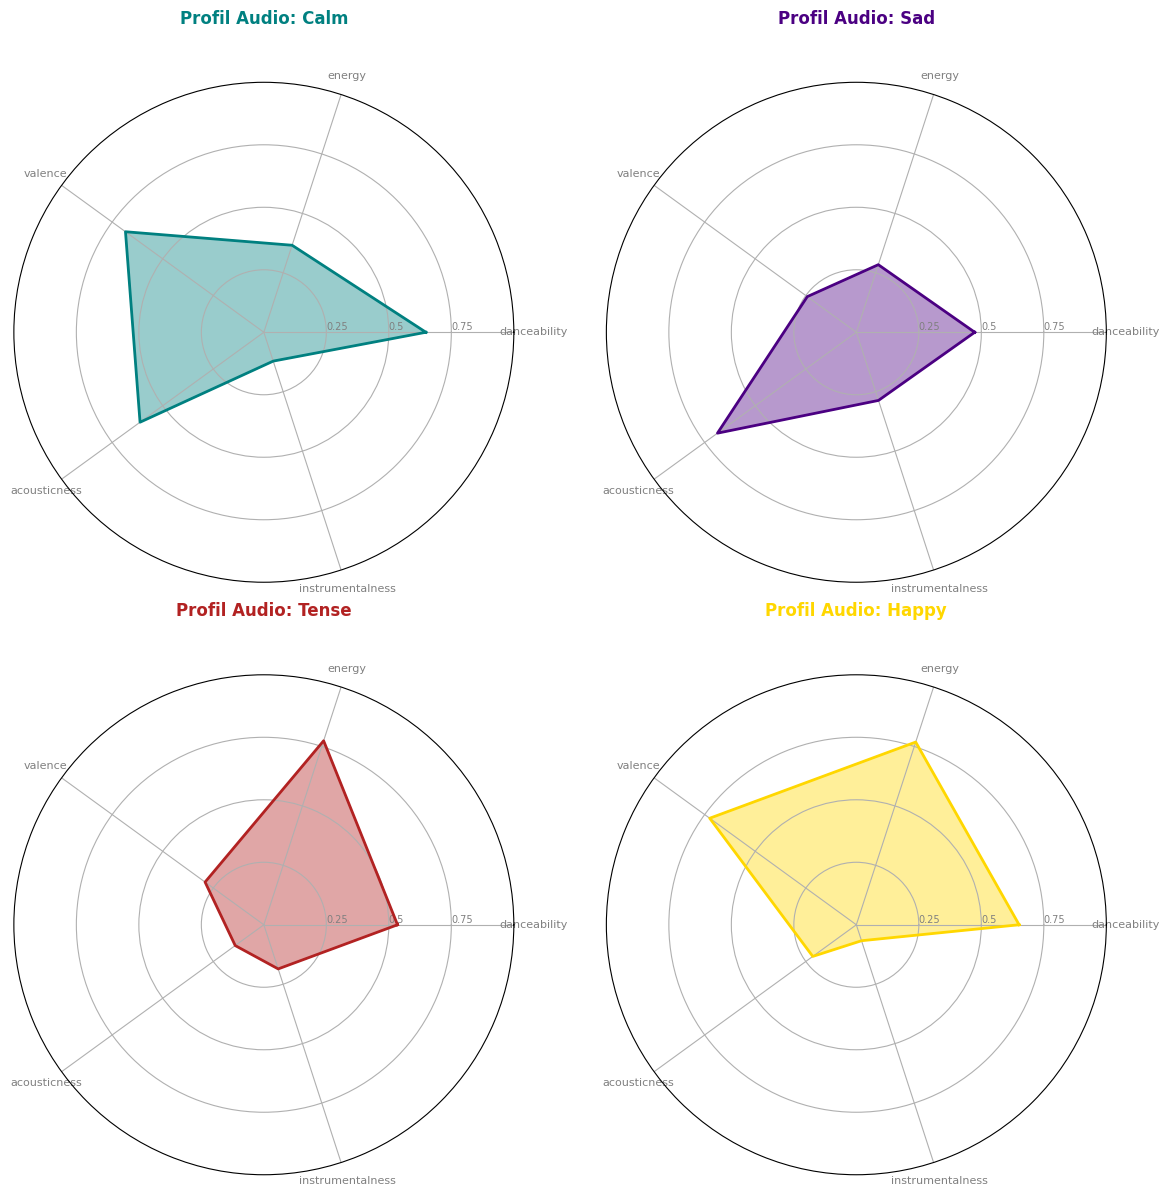

In [17]:
features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

# 2. Hitung Rata-rata per Mood
mood_means = df_scaled.groupby('mood_label')[features].mean().reset_index()

# 3. Setup Radar Chart Logic
categories = features
N = len(categories)

# Menentukan sudut (angle) untuk setiap fitur
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1] # Menutup lingkaran

# Membuat Plot
fig = plt.figure(figsize=(12, 12))
colors = {'Happy': '#FFD700', 'Sad': '#4B0082', 'Calm': '#008080', 'Tense': '#B22222'}

# Loop untuk membuat chart kecil per mood
unique_moods = df['mood_label'].unique()

for i, mood in enumerate(unique_moods):
    ax = plt.subplot(2, 2, i+1, polar=True)

    # Setup Sumbu
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25","0.5","0.75"], color="grey", size=7)
    plt.ylim(0, 1)

    # Ambil Data
    values = mood_means[mood_means['mood_label'] == mood][categories].values.flatten().tolist()
    values += values[:1] # Menutup loop data

    # Gambar Garis
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=colors.get(mood, 'blue'))
    ax.fill(angles, values, color=colors.get(mood, 'blue'), alpha=0.4)

    plt.title(f"Profil Audio: {mood}", size=12, color=colors.get(mood, 'blue'), weight='bold', y=1.1)

plt.tight_layout()

plt.show()

In [18]:
#save model
joblib.dump(rf_model, 'music_mood_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("Model dan Label Encoder berhasil disimpan!")

Model dan Label Encoder berhasil disimpan!
